# 对数变换
## 原理回顾对数变换的函数形式为$$g(x,y)=C\times\log(1 + f(x,y))$$
其中$f(x,y)$表示原始图像在坐标$(x,y)$处的像素灰度值，$g(x,y)$是变换后对应位置的像素灰度值，$C$为常数，通常用于调整变换的强度。通过对原始图像的每个像素灰度值应用这个函数，能够压缩图像的动态范围，让低灰度值区域的细节更加明显。

例如，如果你有一张高动态范围的风景图像，图像中天空部分很亮，地面部分较暗，经过对数变换后，地面较暗区域的细节（比如草丛、石头等的纹理）可能会变得更加清晰可见，整体图像的视觉效果更加平衡，亮度的剧烈变化得到了一定程度的缓和。你可以通过调整常数$C$的值来控制对数变换的强度，找到最适合你需求的变换效果。

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def logarithmic_transform(image, C=1.0):
    """
    对输入图像进行对数变换
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param C: 对数变换的常数，默认值为1.0
    :return: 对数变换后的图像（numpy数组表示）
    """
    # 获取图像的高度和宽度
    height, width = image.shape[:2]
    t_image = [[0 for _ in range(width)] for _ in range(height)] # 防止更改原图像
    # 对图像的每个像素点进行对数变换
    for y in range(height):
        for x in range(width):
            pixel_value = image[y][x]
            # 根据对数变换公式进行计算，为避免log(0)情况，先加1
            new_value = C * np.log(1 + pixel_value)
            # 将计算结果限制在0-255范围内（假设输出图像也是8位灰度图），并转换为整数类型
            new_value = np.clip(new_value, 0, 255).astype(np.uint8)
            t_image[y][x] = new_value
    return t_image

代码解释
- **`logarithmic_transform`函数**：
    - 这个函数接受两个参数，`image`是输入的灰度图像，以二维的`numpy`数组形式表示（通过`cv2.imread`以灰度图模式读取图像时得到的就是这种格式），`C`是对数变换的常数，默认为`1.0`。
    - 在函数内部，首先通过`image.shape[:2]`获取图像的高度和宽度，用于后续遍历图像的每个像素点。
    - 接着使用嵌套的`for`循环遍历图像的每一行（`y`）和每一列（`x`），获取每个像素点的灰度值`pixel_value`，按照对数变换公式\(g(x,y)=C\times\log(1 + f(x,y))\)进行计算，得到新的灰度值`new_value`。
    - 由于`np.log`函数计算得到的结果可能是浮点数，并且范围不一定在图像像素值的有效范围（0 - 255）内，所以使用`np.clip`函数将其限制在这个范围内，然后通过`astype(np.uint8)`将其转换为8位无符号整数类型（符合图像像素值的常见数据类型要求），最后将更新后的像素值放回原图像对应的位置，完成整个图像的对数变换并返回变换后的图像。

## 示例用法
以下示例展示如何读取一张图像，对其进行对数变换，并显示原始图像和变换后的图像以对比效果。

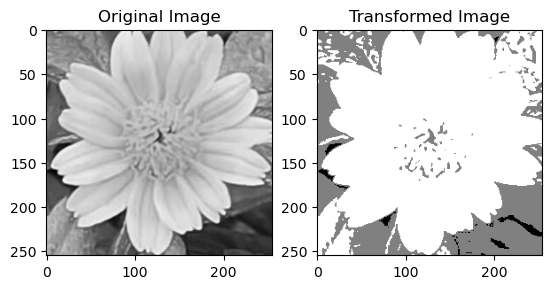

In [8]:
# 读取图像（以灰度图模式读取）
image = cv2.imread('flower.jpg', 0)
# 进行对数变换，这里C取1.0，你可以根据实际效果调整C的值
transformed_image = logarithmic_transform(image, C=1.0)

# 使用matplotlib在Jupyter Notebook中显示原始图像和变换后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

plt.show()

可以看到，低灰度值区域的细节变得更加明显。